In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
#print(os.listdir)
# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
data_visual = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
#print(data)

In [5]:
#getting a top overview of the data
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
#checking the number of rows and columns present
data.shape

(500, 4)

In [7]:
#Any missing value?
#I would have added an imputer object for handling missing values, if any
#I wanted to confirm for null values across all cells.
#Prescence of null values in any cell will return true
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [8]:
#Importing visualization and plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Adding additional columns to DataFrame as per need

In [9]:
# Define a dictionary mapping index values to status descriptions
index_to_status = {
    0: 'Extremely Weak',
    1: 'Weak',
    2: 'Normal',
    3: 'Overweight',
    4: 'Obesity',
    5: 'Extreme Obesity'
}

# Use the map function to map index values to status descriptions
data_visual['Status'] = data_visual['Index'].map(index_to_status)
data_visual.head()



,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [10]:
gender_to_label = {
    'Male': 1,
    'Female': 0
}

data_visual['gender_lbl'] = data_visual['Gender'].map(gender_to_label)
data_visual.head()


,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


Creating the visualizations

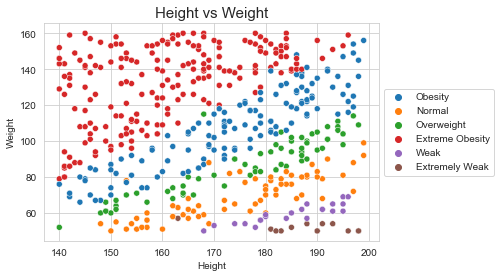

In [11]:


sns.set_style('whitegrid')
sns.scatterplot(data=data_visual, x='Height', y='Weight',
                hue='Status')

plt.title('Height vs Weight', size=15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

plt.show()





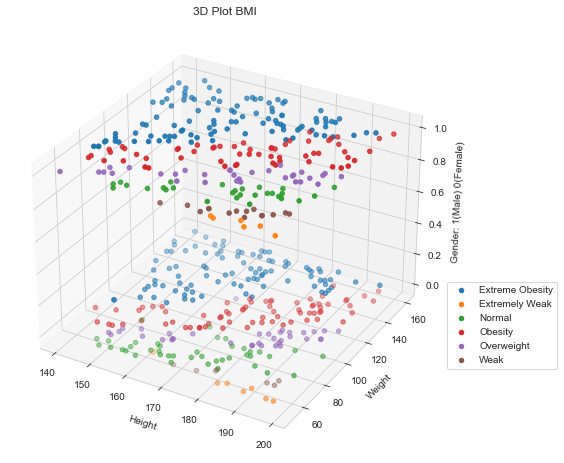

In [12]:
# Creating a 3d scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for status, group in data_visual.groupby('Status'):
    ax.scatter(group['Height'], group['Weight'], group['gender_lbl'], label=status)

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender: 1(Male) 0(Female)')
ax.set_title('3D Plot BMI')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.3), prop={'size': 10})
plt.show()


Counting people based on Gender, Health status, etc

In [13]:
people = data_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()


<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

Doughnut plot (pie-plot) representing features (Gender, Health Status) for all people

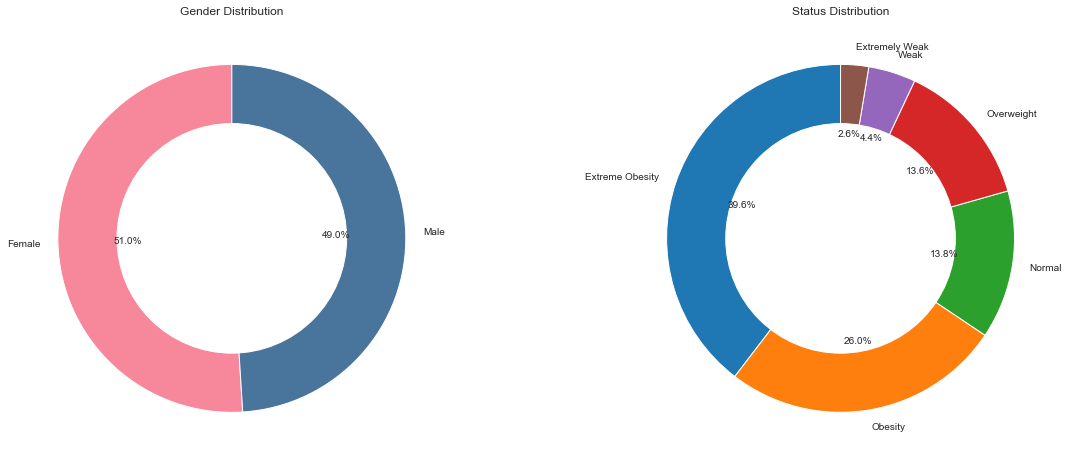

In [14]:
# Data for the first pie chart
people = data_visual['Gender'].value_counts()
labels1 = ['Female', 'Male']
colors1 = ['#f7879a', '#49759c']

# Data for the second pie chart
categories = data_visual['Status'].value_counts()
labels2 = ['Extreme Obesity', 'Obesity', 'Normal', 'Overweight', 'Weak', 'Extremely Weak']

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the first pie chart
wedges1, _, _ = axs[0].pie(people, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender Distribution')

# Adding a white circle to the first pie chart
circle1 = plt.Circle((0, 0), 0.66, color='white')
axs[0].add_artist(circle1)

# Plotting the second pie chart
wedges2, _, _ = axs[1].pie(categories, labels=labels2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Status Distribution')

# Adding a white circle to the second pie chart
circle2 = plt.Circle((0, 0), 0.66, color='white')
axs[1].add_artist(circle2)

plt.show()


In [15]:
data_visual_male = data_visual.loc[data_visual['Gender'] == 'Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [16]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories


Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [17]:
data_visual_female = data_visual.loc[data_visual['Gender'] == 'Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [18]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: Status, dtype: int64

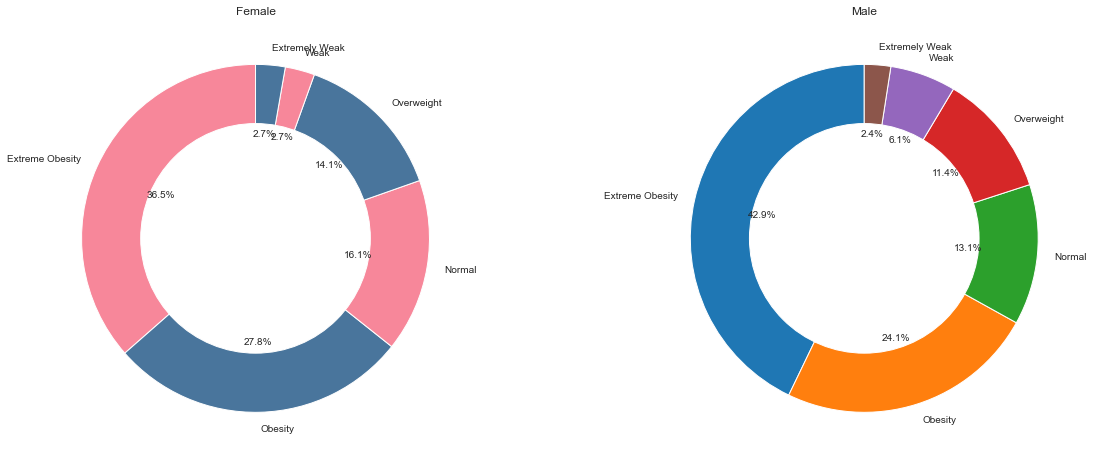

In [19]:
# Data for the first pie chart
labels1 = ['Extreme Obesity', 'Obesity', 'Normal', 'Overweight', 'Weak', 'Extremely Weak']

# Data for the second pie chart
labels2 = ['Extreme Obesity', 'Obesity', 'Normal', 'Overweight', 'Weak', 'Extremely Weak']

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the first pie chart
wedges1, _, _ = axs[0].pie(data_visual_female_categories, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Female')

# Adding a white circle to the first pie chart
circle1 = plt.Circle((0, 0), 0.66, color='white')
axs[0].add_artist(circle1)

# Plotting the second pie chart
wedges2, _, _ = axs[1].pie(data_visual_male_categories, labels=labels2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Male')

# Adding a white circle to the second pie chart
circle2 = plt.Circle((0, 0), 0.66, color='white')
axs[1].add_artist(circle2)

plt.show()

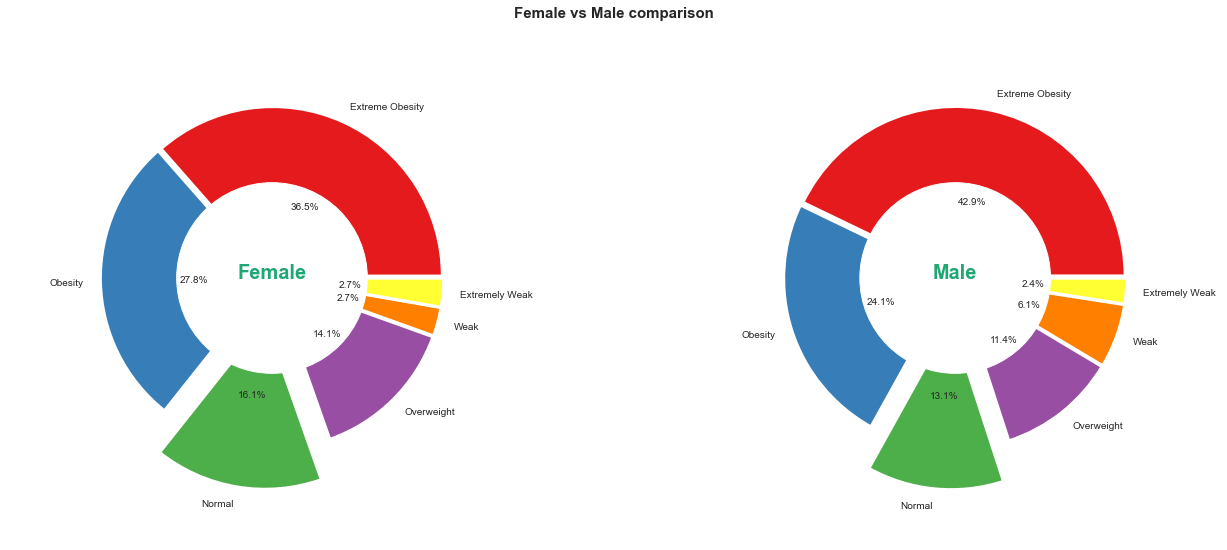

In [20]:
# Data
categories = ['Extreme Obesity', 'Obesity', 'Normal', 'Overweight', 'Weak', 'Extremely Weak']
explode = (0.01, 0.01, 0.2, 0.01, 0.01, 0.01)
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Female Pie Plot
ax1 = axs[0]
ax1.pie(data_visual_female_categories, radius=0.8, explode=explode, labels=categories,
        autopct="%1.1f%%", pctdistance=0.45, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': 'w'})
ax1.text(0, 0, 'Female', size=20, color='#1fa774', horizontalalignment='center', weight='bold')

# Adding a white circle to the female pie plot
circle1 = plt.Circle((0, 0), 0.45, color='white')
axs[0].add_artist(circle1)

# Male Pie Plot
ax2 = axs[1]
ax2.pie(data_visual_male_categories, radius=0.8, explode=explode, labels=categories,
        autopct="%1.1f%%", pctdistance=0.45, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': 'w'})
ax2.text(0, 0, 'Male', size=20, color='#1fa774', horizontalalignment='center', weight='bold')

# Adding a white circle to the male pie plot
circle2 = plt.Circle((0, 0), 0.45, color='white')
axs[1].add_artist(circle2)


plt.suptitle('Female vs Male comparison', fontsize=15, fontweight='bold', y=0.95)
plt.setp(axs, xticks=[], yticks=[])
plt.tight_layout()
plt.show()


Machine learning

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming 'data' is your DataFrame and 0 is the index of the column to encode
column_to_encode = [0]
one_hot_enc_for_gender = OneHotEncoder()

# Create a ColumnTransformer to apply OneHotEncoder to the specified column
ct = ColumnTransformer(
    transformers=[
        ('one_hot_enc', one_hot_enc_for_gender, column_to_encode)
    ],
    remainder='passthrough'  # Pass through other columns unchanged
)

# Apply the transformation
transformed_data = ct.fit_transform(data)

# Convert the transformed data into a DataFrame
data = pd.DataFrame(transformed_data)

# Renaming data as df
df = data
df.head()



,0,1,2,3,4
0,0.0,1.0,174.0,96.0,4.0
1,0.0,1.0,189.0,87.0,2.0
2,1.0,0.0,185.0,110.0,4.0
3,1.0,0.0,195.0,104.0,3.0
4,0.0,1.0,149.0,61.0,3.0


Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
# StandardScaler standardizes by removing the mean and scaling them to unit variance.
# Assuming 'df' is your DataFrame

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

df.iloc[:, :-1] = scaled_data



In [23]:
df.head()

,0,1,2,3,4
0,-1.020204,1.020204,0.247939,-0.309117,4.0
1,-1.020204,1.020204,1.164872,-0.587322,2.0
2,0.980196,-0.980196,0.920357,0.123647,4.0
3,0.980196,-0.980196,1.531645,-0.061823,3.0
4,-1.020204,1.020204,-1.280283,-1.391027,3.0


Splitting data into training and testing sets

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [26]:
print(type(X_train))
X_train.head() 

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
107,-1.020204,1.020204,-0.668995,1.483762
336,0.980196,-0.980196,-0.179963,1.452850
71,-1.020204,1.020204,0.492454,0.340029
474,0.980196,-0.980196,-0.179963,-0.834616
6,-1.020204,1.020204,-1.402541,-0.432764


Ensemble Learning (Random Forest Classification)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier with specified parameters
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)

# Training the classifier using the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

Predicting reults

In [28]:
y_pred_rfc = rfc.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)

# Printing the confusion matrix
print(rfc_cm)


[[ 3  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0  1 12  2  0]
 [ 0  0  1  0 28  3]
 [ 0  0  0  0  0 36]]


In [30]:
from sklearn.metrics import accuracy_score

# Computing the accuracy score
rfc_acc = accuracy_score(y_test, y_pred_rfc)

# Printing the accuracy score as a percentage
print(f"Accuracy: {rfc_acc * 100:.2f}%")


Accuracy: 91.00%


Calculation of optimal number of trees in Random Forest

In [31]:
def trees_in_forest_vs_acc(trees, X_train, y_train, X_test, y_test):
    # Create and train the RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rfc.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    return acc


In [32]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]

# List comprehension to compute accuracy scores for different numbers of trees
acc_scores_for_trees_RFC = [trees_in_forest_vs_acc(x, X_train, y_train, X_test, y_test) for x in trees_list_for_randomForest]

acc_scores_for_trees_RFC


[0.9, 0.91, 0.91, 0.9, 0.9, 0.9]

Visualisation of No. of Trees and their corresponding Accracy scores

,No. of trees,Accuracy
0,100,0.90
1,200,0.91
2,300,0.91
3,500,0.90
4,700,0.90


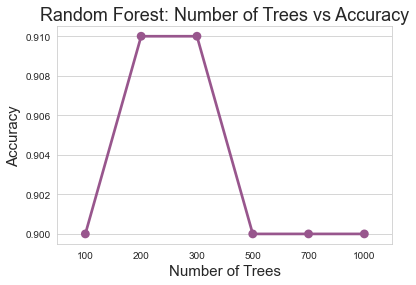

In [33]:
# Create DataFrame with number of trees and accuracy scores
tree_vs_acc = pd.DataFrame({'No. of trees': trees_list_for_randomForest,
                             'Accuracy': acc_scores_for_trees_RFC})

# Plot the relationship between number of trees and accuracy
sns.pointplot(x='No. of trees', y='Accuracy', data=tree_vs_acc, color='#98568d')

# Set title and axis labels
plt.title('Random Forest: Number of Trees vs Accuracy', size=18)
plt.xlabel('Number of Trees', size=15)
plt.ylabel('Accuracy', size=15)

# Display the DataFrame
tree_vs_acc.head()


Code snippet for testing other person's Health Status based on the above model

In [34]:
def health_test(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    # Create a dictionary with individual data
    individual_data_dict = {'Gender': gender, 'Height': height, 'Weight': weight}
    
    # Convert the dictionary to a DataFrame
    individual_data = pd.DataFrame(data=individual_data_dict, index=[0])
    
    # Encode gender using the fitted LabelEncoder
    individual_data['Gender'] = lbl_enc.transform(individual_data['Gender'])
    
    # Transform gender column using the fitted OneHotEncoder
    individual_data_encoded = one_hot_enc_for_gender.transform(individual_data[['Gender']]).toarray()
    
    # Combine encoded gender with height and weight
    individual_data_combined = np.concatenate([individual_data_encoded, individual_data[['Height', 'Weight']].values], axis=1)
    
    # Standardize the data using the fitted StandardScaler
    individual_data_scaled = std_sc.transform(individual_data_combined)
    
    # Predict using the fitted RandomForestClassifier
    y_pred = rfc.predict(individual_data_scaled.reshape(1, -1))
    
    # Map predicted label to descriptive category
    categories = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity']
    result = categories[y_pred[0]]
    
    return result

